In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
api_key = "e350ecd0f8457e05a2d7e54f90968b59"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # Replace spaces with %20 to create url correctly 
    city = city.replace(" ", "%20")
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:

        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

639

In [5]:
# OpenWeatherMap API Key
api_key = "e350ecd0f8457e05a2d7e54f90968b59"

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [6]:
# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Saint Anthony
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=saint%20anthony
Processing Record 2 | Dawei
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=dawei
Processing Record 3 | Punta Arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=punta%20arenas
Processing Record 4 | Atuona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=atuona
Processing Record 5 | Hithadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=hithadhoo
Processing Record 6 | Rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=rikitea
Processing Record 7 | Tiksi
http://api.openweathermap.org/data/2.5/weathe

Processing Record 55 | Port Elizabeth
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=port%20elizabeth
Processing Record 56 | Hailar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=hailar
Processing Record 57 | Sohag
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=sohag
Processing Record 58 | East London
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=east%20london
Processing Record 59 | Torbay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=torbay
Processing Record 60 | Salalah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=salalah
Processing Record 61 | Christchurch
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90

Processing Record 111 | Hashtrud
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=hashtrud
City not found. Skipping...
Processing Record 112 | Chateaubelair
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=chateaubelair
Processing Record 113 | Qaanaaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=qaanaaq
Processing Record 114 | Buala
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=buala
Processing Record 115 | Galyugayevskaya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=galyugayevskaya
Processing Record 116 | Sorong
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=sorong
Processing Record 117 | Barrow
http://api.openweathermap.org/data/2.5/weather?units=Imperi

Processing Record 167 | Porto Novo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=porto%20novo
Processing Record 168 | Broome
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=broome
Processing Record 169 | Sioux Lookout
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=sioux%20lookout
Processing Record 170 | Urman
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=urman
Processing Record 171 | Isangel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=isangel
Processing Record 172 | Lebu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=lebu
Processing Record 173 | Trairi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&

Processing Record 223 | Rockhampton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=rockhampton
Processing Record 224 | North Bend
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=north%20bend
Processing Record 225 | Mao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=mao
City not found. Skipping...
Processing Record 226 | Minab
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=minab
Processing Record 227 | Rocha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=rocha
Processing Record 228 | Santiago del Estero
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=santiago%20del%20estero
City not found. Skipping...
Processing Record 229 | Crestview
http://api.openweatherma

Processing Record 278 | Ostersund
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=ostersund
Processing Record 279 | Mahon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=mahon
Processing Record 280 | Dali
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=dali
Processing Record 281 | Bolu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=bolu
Processing Record 282 | Atar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=atar
Processing Record 283 | Zhicheng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=zhicheng
Processing Record 284 | Mackenzie
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=mackenzie
Processing 

Processing Record 334 | Golden
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=golden
City not found. Skipping...
Processing Record 335 | Arman
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=arman
Processing Record 336 | Panguipulli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=panguipulli
Processing Record 337 | Tabora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=tabora
Processing Record 338 | Pisco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=pisco
Processing Record 339 | Taoudenni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=taoudenni
Processing Record 340 | Havre-Saint-Pierre
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e35

Processing Record 389 | Hisai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=hisai
Processing Record 390 | Torrington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=torrington
Processing Record 391 | Krasnoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=krasnoye
Processing Record 392 | Bandarbeyla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=bandarbeyla
City not found. Skipping...
Processing Record 393 | Rodrigues Alves
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=rodrigues%20alves
Processing Record 394 | Yabelo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=yabelo
Processing Record 395 | Shintomi
http://api.openweathermap.org/data/2.5/weather?units=

Processing Record 445 | Kavieng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=kavieng
Processing Record 446 | Hambantota
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=hambantota
Processing Record 447 | Waingapu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=waingapu
Processing Record 448 | Wanning
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=wanning
Processing Record 449 | Tezu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=tezu
Processing Record 450 | Minot
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=minot
Processing Record 451 | Padang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=padang
Pro

Processing Record 501 | Port Hardy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=port%20hardy
Processing Record 502 | Conceicao do Araguaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=conceicao%20do%20araguaia
City not found. Skipping...
Processing Record 503 | Savalou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=savalou
City not found. Skipping...
Processing Record 504 | Fallon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=fallon
Processing Record 505 | Phalombe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=phalombe
Processing Record 506 | Cockburn Town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=cockburn%20town
Processing Record 507 | Algiers


Processing Record 557 | Eganville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=eganville
Processing Record 558 | Itaituba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=itaituba
Processing Record 559 | Saint-Francois
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=saint-francois
Processing Record 560 | Te Anau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=te%20anau
Processing Record 561 | Krasnovishersk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=krasnovishersk
Processing Record 562 | Campoverde
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=campoverde
Processing Record 563 | Turukhansk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APP

In [7]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          579
Cloudiness    579
Country       579
Date          579
Humidity      579
Lat           579
Lng           579
Max Temp      579
Wind Speed    579
dtype: int64

In [10]:
# Save data frame to CSV
weather_data.to_csv('weather_data.csv')

# Display data frame head 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Saint Anthony,1,US,1562259940,59,43.97,-111.68,64.00,4.70
1,Dawei,100,MM,1562259941,83,14.07,98.19,80.87,22.86
2,Punta Arenas,40,CL,1562259942,74,-53.16,-70.91,33.80,10.29
3,Atuona,30,PF,1562259944,68,-9.80,-139.03,79.97,8.14
4,Hithadhoo,100,MV,1562259748,77,-0.60,73.08,84.47,12.39


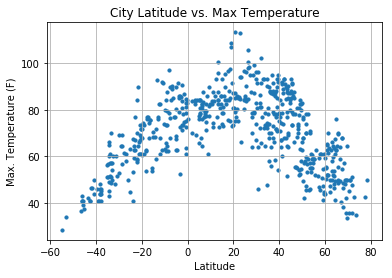

In [11]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Weather-Py.png")

# Show plot
plt.show()

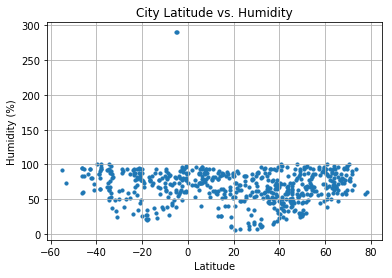

In [12]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Weather-Py.png")

# Show plot
plt.show()

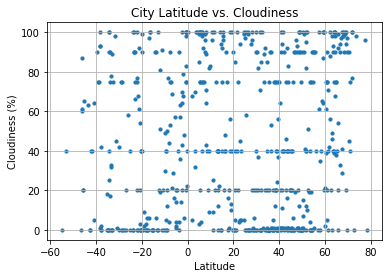

In [13]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Weather-Py.png")

# Show plot
plt.show()

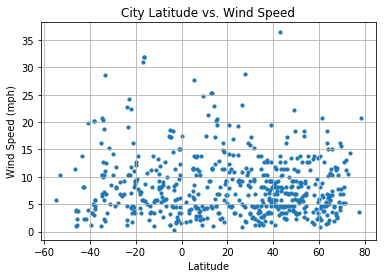

In [14]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Weather-Py.png")

# Show plot
plt.show()